# Carga de datos

In [91]:
import xml.etree.ElementTree as ET

In [92]:
file_path = 'archive.tmx'

In [93]:
def parse_tmx_file(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    translations = []
    for tu in root.findall('.//tu'):
        translation = {}
        number = tu.attrib
        number.get('tuid')
        for tuv in tu.findall('.//tuv'):
            etiqueta = tuv.attrib
            #print(etiqueta)
            lang = etiqueta.get('{http://www.w3.org/XML/1998/namespace}lang')
            #print(lang)
            segment = tuv.find('.//seg').text
            translation[lang] = segment
        translations.append(translation)

    return translations

In [94]:
translation_pairs = parse_tmx_file(file_path)

In [95]:
print(translation_pairs)

[{'en': 'Home Help Computer enquiries Categories Digital signature (certificate or electronic ID card) and PIN key system Electronic certificates Cómo realizar una copia de seguridad de su certificado electrónico Instrucciones para Macintosh Copia del certificado electrónico en Google Chrome (Mac)', 'es': 'Inicio Ayuda Consultas informáticas Categorías Firma digital (certificado o DNI electrónico) y sistema de claves PIN Certificados electrónicos Cómo hacer una copia de seguridad de tu certificado electrónico Instrucciones para Macintosh Cómo copiar tu certificado electrónico en Google Chrome (Mac)'}, {'en': 'Copy of the electronic certificate in Google Chrome (Mac)', 'es': 'Copia del certificado electrónico en Google Chrome (Mac)'}, {'en': 'The online Securities Portfolio service allows you to obtain an informative summary of operations carried out in 2015 relating to shares quoted on official Spanish secondary securities markets (Stock Exchanges) or on those defined in Directive 2004

In [96]:
claves = translation_pairs[0].keys() 

In [97]:
print(claves)

dict_keys(['en', 'es'])


In [98]:
for idx, doc in enumerate(translation_pairs, start=0):
    if(doc['es'] == None) :
        print('es' + doc['es'])
    if(doc['en'] == None):
        print('en ' + str(idx)+ ' ' + str(doc['es']))

en 15314 Tercer curso de educación infantil
en 15317 Realización de pericias a solicitud de particulares por los Institutos de Medicina Legal y Ciencias forenses, en las reclamaciones extrajudiciales por hechos relativos a la circulación de vehículos a motor.


In [99]:
translation_pairs[15314]['en']= "Third year of early childhood education"
translation_pairs[15317 ]['en']= "Expert opinions at the request of individuals by the Institutes of Forensic Medicine and Forensic Sciences, in extrajudicial claims for facts related to the circulation of motor vehicles."

# Normalizacion


In [100]:
!pip install spacy
!python -m spacy download es
!python -m spacy download en_core_web_sm


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     - -------------------------------------- 0.6/12.9 MB 12.2 MB/s eta 0:00:02
     --- ------------------------------------ 1.1/12.9 MB 11.9 MB/s eta 0:00:01
     ----- ---------------------------------- 1.7/12.9 MB 11.7 MB/s eta 0:00:01
     ------ --------------------------------- 2.2/12.9 MB 11.7 MB/s eta 0:00:01
     -------- ------------------------------- 2.7/12.9 MB 11.6 MB/s eta 0:00:01
     ---------- ----------------------------- 3.3/12.9 MB 11.6 MB/s eta 0:00:01
     ----------- ---------------------------- 3.8/12.9 MB 11.6 MB/s eta 0:00:01
     ------------- -------------------------- 4.4/12.9 MB 11.6 MB/s eta 0:00:01
     --------------- ------------------------ 4.9/12.9 MB 11.6 MB/s eta 0:00:01
     ---------------- ----------------------- 5.3/12.9 MB 11.8 MB/s eta 0:00:01
   


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.4/12.8 MB 11.2 MB/s eta 0:00:02
     -- ------------------------------------- 0.9/12.8 MB 11.4 MB/s eta 0:00:02
     ---- ----------------------------------- 1.4/12.8 MB 11.5 MB/s eta 0:00:01
     ------ --------------------------------- 2.0/12.8 MB 11.4 MB/s eta 0:00:01
     ------- -------------------------------- 2.5/12.8 MB 11.5 MB/s eta 0:00:01
     --------- ------------------------------ 3.0/12.8 MB 11.4 MB/s eta 0:00:01
     ----------- ---------------------------- 3.6/12.8 MB 11.5 MB/s eta 0:00:01
     ------------ --------------------------- 4.1/12.8 MB 11.5 MB/s eta 0:00:01
     -------------- ------------------------- 4.7/12.8 MB 11.5 MB/s eta 0:00:01
     ---------------- ----------------------- 5.2/12.8 MB 11.9 MB/s eta 0:00:01
     ------------------ --------------------- 5.8/12.8 MB 11.9 MB/s eta 0:00:01
     ------------------- -------------------- 6.


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [101]:
import spacy

In [102]:
idioma_ingles = 'en_core_web_sm'
idioma_espanol = 'es_core_news_sm'

In [103]:
nlp_es = spacy.load('es_core_news_sm')  #Español

In [104]:
nlp_en = spacy.load('en_core_web_sm') #Ingles

In [105]:
print(nlp_en)

**Obtenemos conjunto de stopwords para ingles y español**


In [106]:
stop_words_en = spacy.lang.en.stop_words.STOP_WORDS

In [107]:
stop_words_es = spacy.lang.es.stop_words.STOP_WORDS

In [108]:
print(stop_words_es)

{'mientras', 'de', 'podriais', 'dado', 'ninguno', 'toda', 'aunque', 'estaban', 'qeu', 'menudo', 'tenido', 'casi', 'contra', 'para', 'dieron', 'pudo', 'éstas', 'consigue', 'ellos', 'nuestra', 'delante', 'total', 'usan', 'e', 'eramos', 'aquéllos', 'tener', 'nuestro', 'estoy', 'ninguna', 'ahí', 'pocos', 'sea', 'dar', 'esto', 'ocho', 'partir', 'tiene', 'cuánto', 'sí', 'alguna', 'cómo', 'tambien', 'tal', 'una', 'poner', 'mia', 'vuestra', 'buenas', 'ella', 'demasiado', 'solos', 'nunca', 'tu', 'siguiente', 'hoy', 'peor', 'habla', 'voy', 'encima', 'detras', 'son', 'sabes', 'puede', 'parece', 'entonces', 'última', 'os', 'cuantas', 'diez', 'sois', 'cuánta', 'u', 'todo', 'ésta', 'tuyo', 'ustedes', 'diferente', 'deprisa', 'será', 'primera', 'mis', 'cinco', 'solas', 'dos', 'atras', 'donde', 'quiénes', 'bastante', 'un', 'posible', 'existen', 'muchas', 'día', 'debe', 'haciendo', 'mucho', 'grandes', 'podrán', 'sabeis', 'nueve', 'ningunos', 'y', 'llegó', 'contigo', 'dicho', 'doce', 'parte', 'suyos', 'a

Agregar nodelo en ingles, para el ingles

In [109]:
def tokenize(text, lang='en'):
    if lang == 'en':
        return [token for token in nlp_en(text)]
    elif lang == 'es':
        return [token for token in nlp_es(text)]
    else:
        raise ValueError("Language not supported")

In [110]:
def remove_stopwords(tokens, lang='en'):
    if lang == 'en':
        return [token for token in tokens if token.lower() not in stop_words_en]
    elif lang == 'es':
        return [token for token in tokens if token.lower() not in stop_words_es]
    else :
        raise ValueError("Language not supported")

In [111]:
def lemmatize(tokens, lang='en'):
    if lang == 'en':
        return [token.lemma_ for token in tokens]
    elif lang == 'es':
        return [token.lemma_ for token in tokens]
    else:
        raise ValueError("Language not supported")

In [112]:
import re
import unicodedata

In [113]:
def normalize_characters(tokens, lang='en'):
    if lang == 'en':
        # Convertir cada token a minúsculas y eliminar caracteres no alfanuméricos excepto espacios
        normalized_tokens = [re.sub(r'[^a-z0-9\s]', '', token.lower()) for token in tokens]
        normalized_tokens = [re.sub(r'(https?|ftp)://[^\s/$.?#].[^\s]*', '', token) for token in normalized_tokens] 
        normalized_tokens = [re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', token) for token in normalized_tokens]
    elif lang == 'es':
        # Convertir cada token a Unicode NFC y eliminar caracteres no alfanuméricos excepto letras y espacios
        normalized_tokens = [re.sub(r'[^\w\sáéíóúüñ]', '', unicodedata.normalize('NFC', token)) for token in tokens]
        normalized_tokens = [re.sub(r'(https?|ftp)://[^\s/$.?#].[^\s]*', '', token) for token in normalized_tokens] 
        normalized_tokens = [re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', token) for token in normalized_tokens]
    else:
        raise ValueError("Language not supported")
    normalized_tokens = [token for token in normalized_tokens if token.strip()]
    return normalized_tokens

In [114]:
def segment_sentences(tokens, lang='en'):
    if lang == 'en':
        text = ' '.join(tokens)
        return [sent.text for sent in nlp_en(text).sents]
    elif lang == 'es':
        text = ' '.join(tokens)
        return [sent.text for sent in nlp_es(text).sents]
    else:
        raise ValueError("Language not supported")

In [115]:
def process_corpus1(corpus):
    processed_corpus = []
    for doc in corpus:
        dic_tempo = {}
        for lang in doc:
            text = doc[lang]
            tokens = tokenize(text,lang)
            tokens = remove_stopwords(tokens, lang)
           # tokens = lemmatize(text, lang)
           # sentences = segment_sentences(text, lang)
            #, 'sentences':sentences
            dic_tempo[lang] = tokens
        processed_corpus.append(dic_tempo)
    return processed_corpus         

In [144]:
def process_corpus(corpus):
    processed_corpus = []
    for doc in corpus:
            dic_tempo = {}
            text = doc['en']
            texto = doc['es']
            tokens = tokenize(text,'en')
            tokens = lemmatize(tokens, 'en')
            tokens = remove_stopwords(tokens, 'en')
            tokens = normalize_characters(tokens, 'en')
            sentence = text
            tokens_es = tokenize(texto,'es')
            tokens_es = lemmatize(tokens_es, 'es')
            tokens_es = remove_stopwords(tokens_es, 'es') 
            tokens_es = normalize_characters(tokens_es, 'es')
            sentence_es = texto
            dic_tempo = {'en':{'tokens':tokens, 'sentence':sentence },'es':{'tokens':tokens_es,'sentence':sentence_es}}
            processed_corpus.append(dic_tempo)
    return processed_corpus         

In [145]:
processed_corpus  = process_corpus(translation_pairs)


In [146]:
processed_corpus[1]

{'en': {'tokens': ['copy',
   'electronic',
   'certificate',
   'google',
   'chrome',
   'mac'],
  'sentence': 'Copy of the electronic certificate in Google Chrome (Mac)'},
 'es': {'tokens': ['Copia',
   'certificado',
   'electrónico',
   'Google',
   'Chrome',
   'Mac'],
  'sentence': 'Copia del certificado electrónico en Google Chrome (Mac)'}}

In [119]:
translation_pairs[1]

{'en': 'Copy of the electronic certificate in Google Chrome (Mac)',
 'es': 'Copia del certificado electrónico en Google Chrome (Mac)'}

# Visualizacion de datos

In [284]:
!pip install wordcloud

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [285]:
!pip install wordcloud==1.8.0

  Using cached wordcloud-1.8.0.tar.gz (217 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for wordcloud
Failed to build wordcloud


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [36 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-3.9\wordcloud
  UPDATING build\lib.win-amd64-3.9\wordcloud/_version.py
  set bu

In [186]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

In [185]:
#Obtenemos los top n tokens, contamos y los 10 mayores obtenemos
#def get_top_n_tokens(token_counts, n=10):
    # Filtrar tokens vacíos antes de ordenarlos
   # token_counts_filtered = {token: count for token, count in token_counts.items() if token.strip()}
    # Ordenar los tokens filtrados por frecuencia
   # sorted_tokens = sorted(token_counts_filtered.items(), key=lambda x: x[1], reverse=True)
    # Tomar los primeros N tokens
    #top_n_tokens = dict(sorted_tokens[:n])
    #return top_n_tokens


In [178]:
def get_token_counts(corpus, idioma):
    counts = {}
    for document in corpus:
        for token in document[idioma]['tokens']:
            counts[token] = counts.get(token, 0) + 1
    return counts



In [179]:
en_counts = get_token_counts(processed_corpus, "en")
es_counts = get_token_counts(processed_corpus , "es")

In [181]:
def get_top_n_tokens(token_counts, n=10):
    sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)
    top_n_tokens = dict(sorted_tokens[:n])
    return top_n_tokens

# Obtener los 10 tokens más comunes para cada idioma
top_10_en_counts = get_top_n_tokens(en_counts, n=10)
top_10_es_counts = get_top_n_tokens(es_counts, n=10)


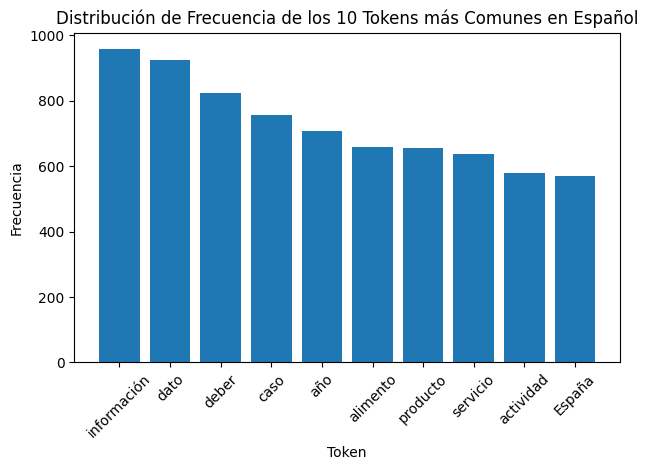

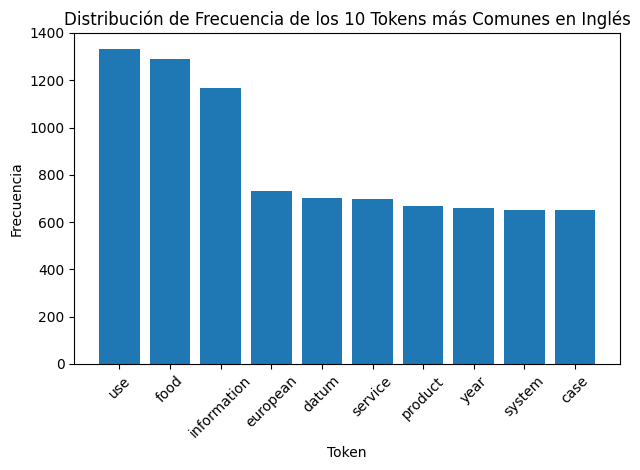

In [182]:
# 1. Histograma (ejemplo para tokens en Español)
plt.bar(top_10_es_counts.keys(), top_10_es_counts.values())
plt.xlabel("Token")
plt.ylabel("Frecuencia")
plt.title("Distribución de Frecuencia de los 10 Tokens más Comunes en Español")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Histograma (ejemplo para tokens en inglés)
plt.bar(top_10_en_counts.keys(), top_10_en_counts.values())
plt.xlabel("Token")
plt.ylabel("Frecuencia")
plt.title("Distribución de Frecuencia de los 10 Tokens más Comunes en Inglés")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

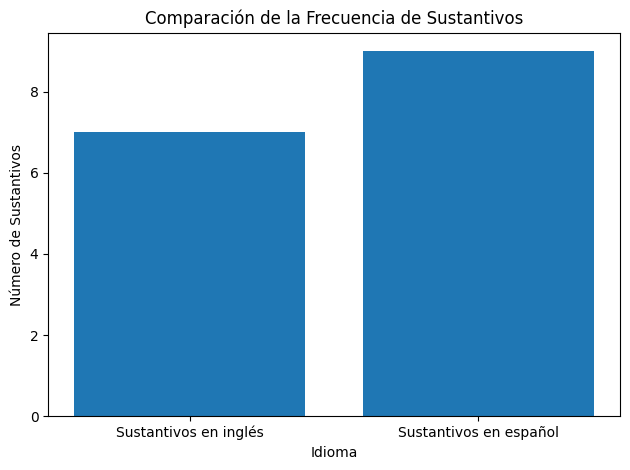

In [183]:
# 2. Gráfico de barras (ejemplo comparando frecuencias de sustantivos)
def is_noun(token, nlp):
    doc = nlp(token)
    return any(token.pos_ in ['NOUN'] for token in doc)
# Identificar sustantivos en inglés en los 10 tokens más comunes
en_nouns = {token for token in top_10_en_counts if is_noun(token, nlp_en)}
# Identificar sustantivos en español en los 10 tokens más comunes
es_nouns = {token for token in top_10_es_counts if is_noun(token, nlp_es)}
plt.bar(["Sustantivos en inglés", "Sustantivos en español"], [len(en_nouns), len(es_nouns)])
plt.xlabel("Idioma")
plt.ylabel("Número de Sustantivos")
plt.title("Comparación de la Frecuencia de Sustantivos")
plt.tight_layout()
plt.show()

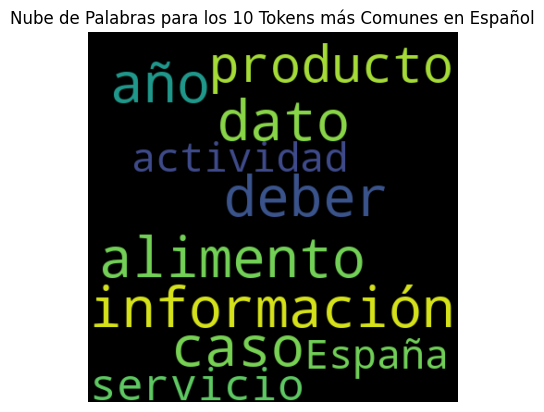

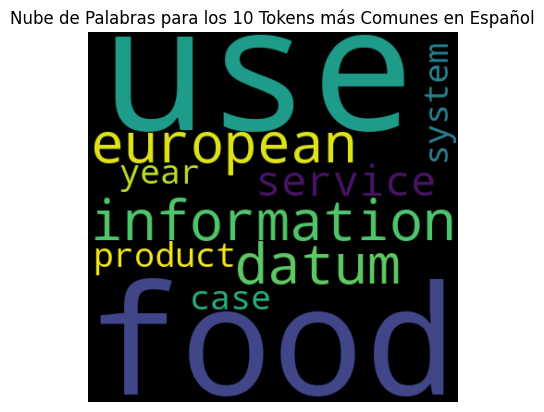

In [187]:
# 3. Nube de palabras (ejemplo para tokens en español)
wordcloud = WordCloud(width=400, height=400).generate(" ".join(top_10_es_counts.keys()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para los 10 Tokens más Comunes en Español")
plt.show()


# Nube de palabras (ejemplo para tokens en Ingles)
wordcloud = WordCloud(width=400, height=400).generate(" ".join(top_10_en_counts.keys()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para los 10 Tokens más Comunes en Español")
plt.show()